# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import The Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Dataset Overview

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# EDA

# 1. Manual

Text(0.5, 1.0, 'Features Correlation Heatmap')

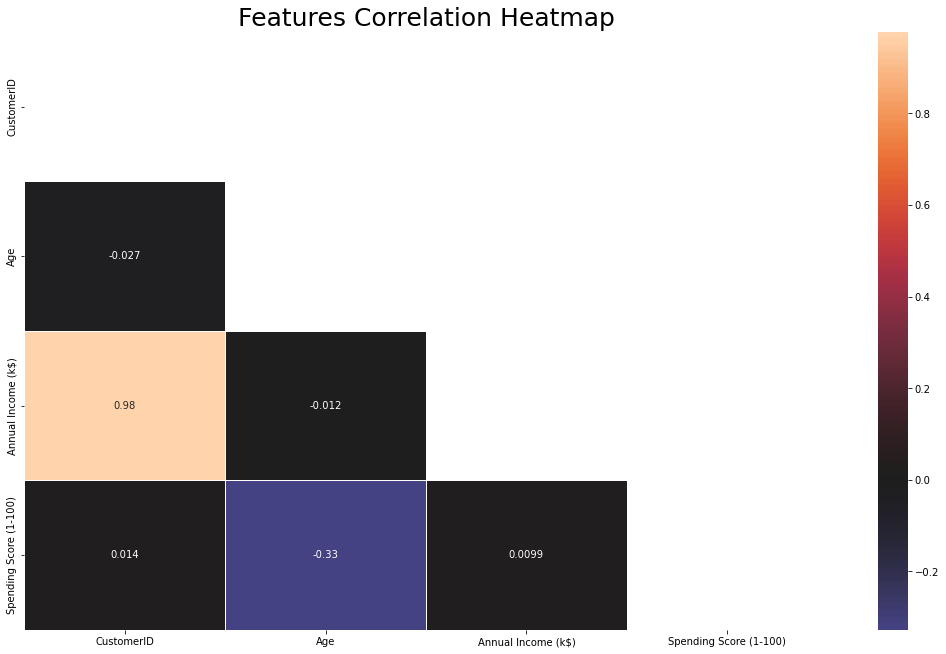

In [5]:
plt.figure(figsize=(18, 11))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)

plt.title('Features Correlation Heatmap', fontsize = 25)

Text(0.5, 0.98, 'Gender-Factor Correlations')

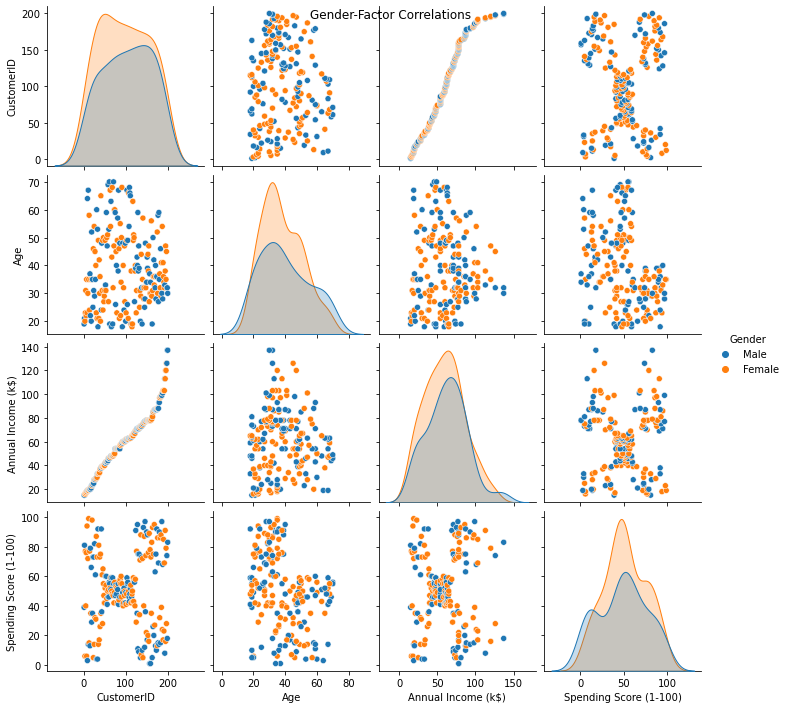

In [15]:
pp = sns.pairplot(df, hue = 'Gender')
pp.fig.suptitle("Gender-Factor Correlations")

Text(0.5, 1.1, 'Gender')

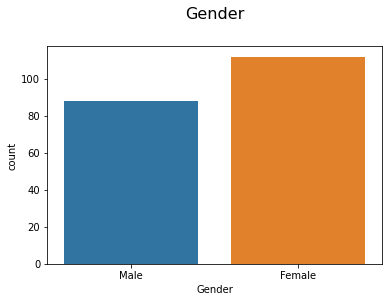

In [10]:
sns.countplot(data = df, x = 'Gender')
plt.title('Gender', fontsize = 16, y = 1.1)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

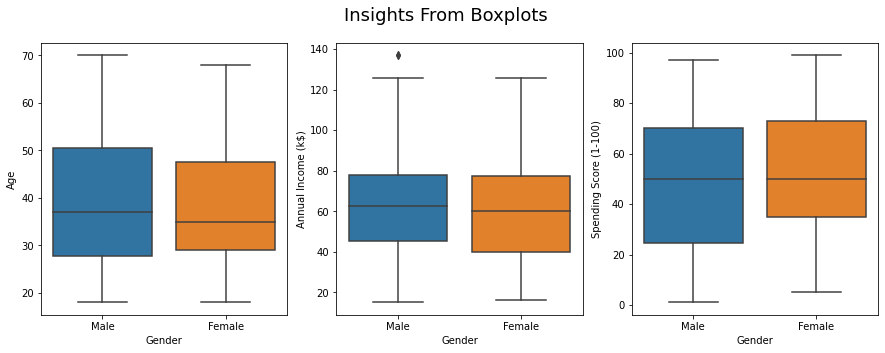

In [9]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
fig.suptitle('Insights From Boxplots', fontsize = 18)

sns.boxplot(data = df, x = 'Gender', y = 'Age', ax = axes[0])
sns.boxplot(data = df, x = 'Gender', y = 'Annual Income (k$)', ax = axes[1])
sns.boxplot(data = df, x = 'Gender', y = 'Spending Score (1-100)', ax = axes[2])

# 2. Pandas Profiling

In [16]:
import pandas_profiling as pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [17]:
pp.ProfileReport(df)

AttributeError: 'PairGrid' object has no attribute 'ProfileReport'

# Data Cleaning

In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

KeyError: "['CustomerID' 'Gender'] not found in axis"

In [50]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# K-Means Clustering

In [22]:
#libraries

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##  Scaling & Dividing Dataset

In [35]:
X1 = df.drop('Age', axis = 1)
X2 = df.drop('Annual Income (k$)', axis = 1)
X3 = df.drop('Spending Score (1-100)', axis = 1)

In [36]:
scaler = StandardScaler()
scaled_X1 = scaler.fit_transform(X1)
scaled_X2 = scaler.fit_transform(X2)
scaled_X3 = scaler.fit_transform(X3)

In [37]:
scaled_df = scaler.fit_transform(df)

## X1

In [38]:
ssd1 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X1)
    
    ssd1.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

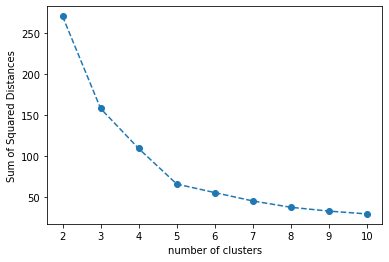

In [41]:
plt.plot(range(2,11), ssd1, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [78]:
X1_model = KMeans(n_clusters=5, random_state=101)

In [43]:
X1_model.fit(scaled_X1)

KMeans(n_clusters=5, random_state=101)

In [44]:
X1_labels = X1_model.labels_
X1_centroids = X1_model.cluster_centers_

In [45]:
X1['labels'] = X1_labels

In [46]:
X1_centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

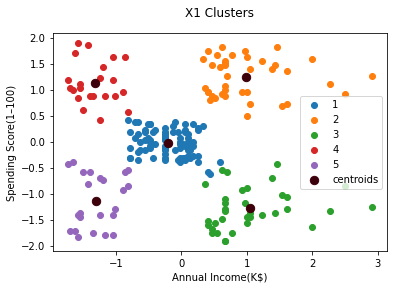

In [48]:
for i in range(0,5):
    plt.scatter(scaled_X1[X1_labels == i , 0] , scaled_X1[X1_labels == i , 1] , label = i+1)
plt.scatter(X1_centroids[:,0], X1_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X1 Clusters', y = 1.05)
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1–100)')
plt.legend()

## X2

In [51]:
ssd2 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X2)
    
    ssd2.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

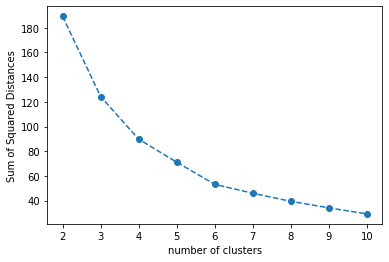

In [52]:
plt.plot(range(2,11), ssd2, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [53]:
# 6 is the best cluster number

In [54]:
X2_model = KMeans(n_clusters=6, random_state=101)

In [55]:
X2_model.fit(scaled_X2)

KMeans(n_clusters=6, random_state=101)

In [56]:
X2_labels = X2_model.labels_
X2_centroids = X2_model.cluster_centers_

In [57]:
X2['labels'] = X2_labels

In [58]:
X2_centroids

array([[-0.98830286,  0.01062485],
       [ 1.00613779, -1.40702839],
       [-0.62254456,  1.24814723],
       [ 0.59071744, -0.16514902],
       [-0.37103379, -1.31216875],
       [ 1.86593393, -0.01358755]])

Text(0, 0.5, 'Spending Score(1–100)')

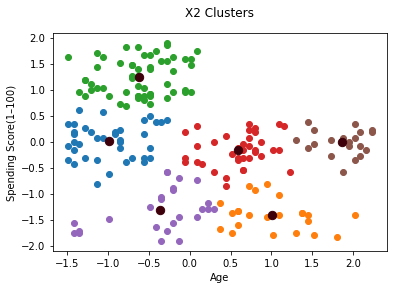

In [59]:
for i in range(0,6):
    plt.scatter(scaled_X2[X2_labels == i , 0] , scaled_X2[X2_labels == i , 1] , label = i+1)
plt.scatter(X2_centroids[:,0], X2_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X2 Clusters', y = 1.05)
plt.xlabel('Age')
plt.ylabel('Spending Score(1–100)')

## X3

In [60]:
ssd3 = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X3)
    
    ssd3.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

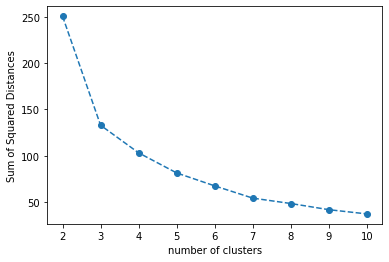

In [61]:
plt.plot(range(2,11), ssd3, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [62]:
#3 is the best number of clusters

In [63]:
X3_model = KMeans(n_clusters=3, random_state=101)

In [64]:
X3_model.fit(scaled_X3)

KMeans(n_clusters=3, random_state=101)

In [65]:
X3_labels = X3_model.labels_
X3_centroids = X3_model.cluster_centers_

In [66]:
X3['labels'] = X3_labels

In [67]:
X3_centroids

array([[-0.87474334, -0.83093616],
       [ 1.2169084 , -0.35628084],
       [-0.27913465,  0.96851913]])

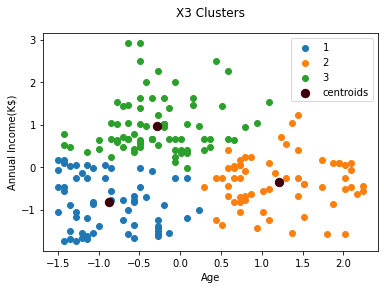

In [68]:
for i in range(0,3):
    plt.scatter(scaled_X3[X3_labels == i , 0] , scaled_X3[X3_labels == i , 1] , label = i+1)
plt.scatter(X3_centroids[:,0], X3_centroids[:,1], s = 70, c = '#3d000a', label = 'centroids')
plt.title('X3 Clusters', y = 1.05)
plt.xlabel('Age')
plt.ylabel('Annual Income(K$)')
plt.legend()

## df

In [69]:
ssdf = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_df)
    
    ssdf.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

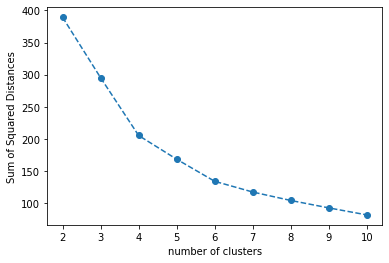

In [70]:
plt.plot(range(2,11), ssdf, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

In [71]:
# 6 is the best number of clusters

In [72]:
df_model = KMeans(n_clusters=6, random_state=42)

In [73]:
df_model.fit(scaled_df)

KMeans(n_clusters=6, random_state=42)

In [74]:
df_labels = df_model.labels_
df_centroids = df_model.cluster_centers_

In [75]:
df['labels'] = df_labels

In [76]:
df_centroids

array([[-0.99396865, -1.34734766,  1.06404834],
       [ 1.25472096, -0.24021294, -0.04399777],
       [ 0.22171558,  1.08322527, -1.29005223],
       [-0.86515664, -0.13196835, -0.08043031],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.47895722, -1.30822992, -1.19644353]])

C:\Users\Shofi\AppData\Local\Temp/ipykernel_27056/398694252.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


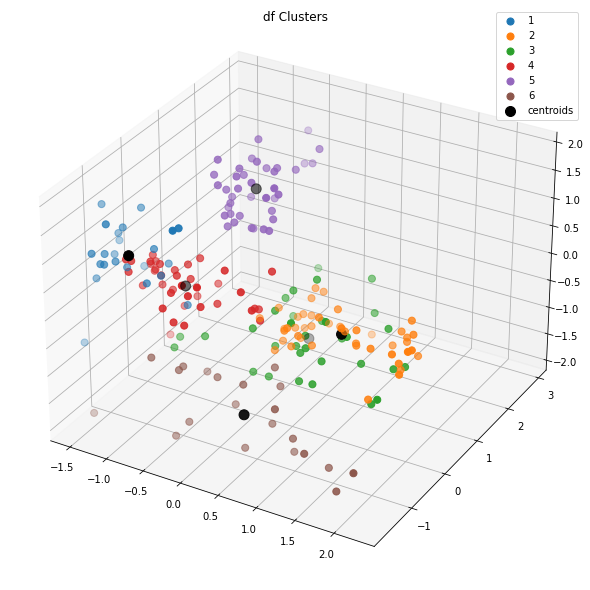

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = Axes3D(fig)

u_labels = np.unique(df_labels)

for i in u_labels:
    
    ax.scatter(scaled_df[df_labels == i , 0],
               scaled_df[df_labels == i , 1],
               scaled_df[df_labels == i , 2],
               label = i+1, s = 50)
    
ax.scatter(df_centroids[:,0], df_centroids[:,1], df_centroids[:,2], s = 100, c = '0', label = 'centroids')

plt.title('df Clusters', y = 1.05)
plt.legend()